Decision Tree

In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

columns_to_drop = ['Age', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']
df = df.drop(columns=columns_to_drop)

df.head()

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1


In [2]:
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [3]:
#split the dataset
X = df.iloc[:, :-1].to_numpy() #sélectionne toutes les lignes (:), mais seulement les colonnes jusqu'à l'avant-dernière colonne ([:-1]) NON,qui est généralement la colonne de la variable cible (la variable que tu cherches à prédire). 
Y = df.iloc[:,-1].to_numpy() #Cette ligne extrait la variable cible (target) de ton DataFrame df. Elle sélectionne toutes les lignes (:), mais seulement la dernière colonne (-1)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [4]:
#train the decision tree
from sklearn.tree import DecisionTreeClassifier #on importe la classe Decision_tree import DecisionTree

clf = DecisionTreeClassifier(random_state=0) #Le paramètre random_state est fixé à 0 pour assurer la reproductibilité des résultats. Le modèle d'arbre de décision est stocké dans la variable clf.
#fait référence à la capacité à reproduire les mêmes résultats ou sorties lorsqu'on exécute un code ou un modèle sur les mêmes données avec les mêmes paramètres.

clf.fit(X_train, Y_train) #entraîne le modèle d'arbre de décision

DecisionTreeClassifier(random_state=0)

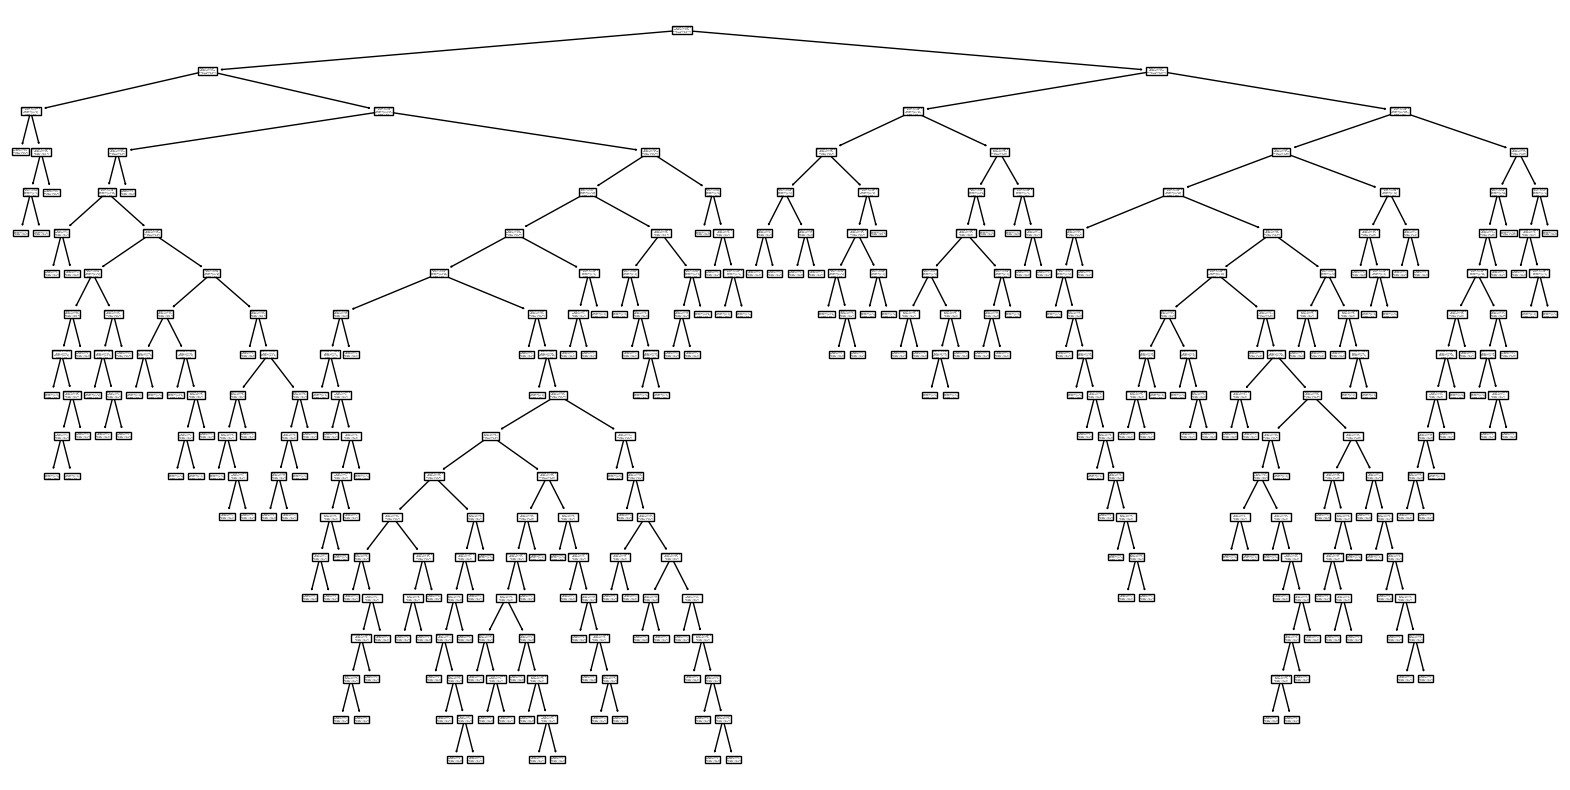

In [5]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Création d'une figure de taille spécifiée
plt.figure(figsize=(20, 10))

# Utilisation de la fonction plot_tree pour visualiser l'arbre de décision
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['NO', 'YES'])

# Affichage de la figure
plt.show()


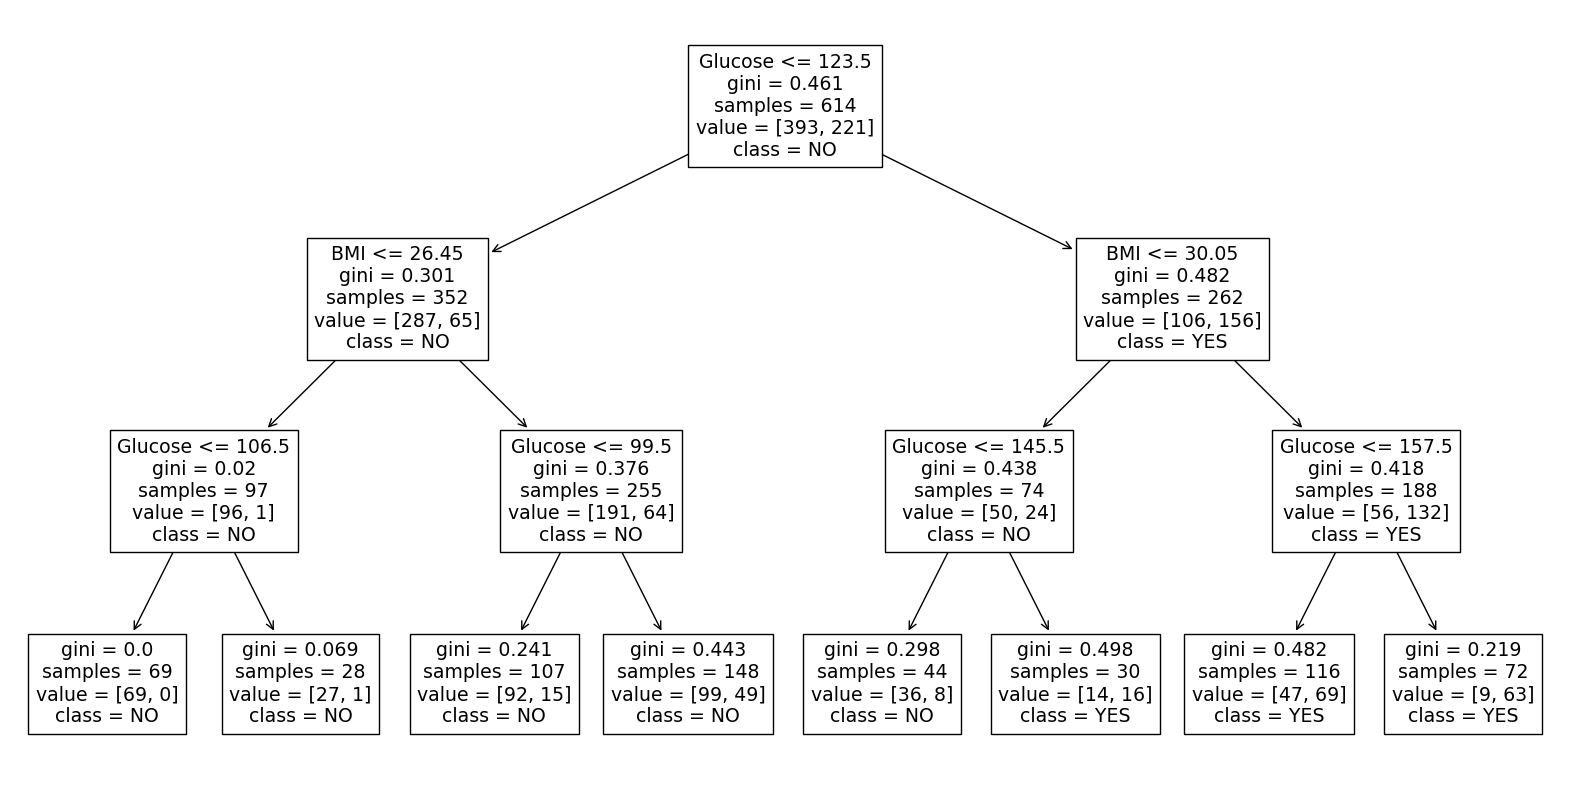

In [7]:
#update the hyperparameter
clf.set_params(max_depth=3) #tu limites la croissance de l'arbre à une profondeur maximale de 3 niveaux.

clf.fit(X_train, Y_train)

plt.figure(figsize=(20, 10))

plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['NO', 'YES'])

plt.show()

#Ces lignes de code génèrent une nouvelle visualisation de l'arbre de décision après la mise à jour de l'hyperparamètre. 
#L'option filled=True colore les nœuds en fonction de la classe majoritaire, ce qui facilite la compréhension de l'arbre.

#L'utilisation de max_depth=3 signifie que l'arbre ne pourra pas avoir plus de trois niveaux de profondeur à partir de la racine. Cela limite la complexité de l'arbre et peut aider à prévenir le surajustement en rendant le modèle plus simple.

In [8]:
#effectue des prédictions à l'aide du modèle d'arbre de décision (clf).
clf.predict([[90,20], [200,30]])


array([0, 1], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score

#prédictions sur l'ensemble de test (X_test)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.7597402597402597


Random Forest code

In [11]:
from sklearn.ensemble import RandomForestClassifier

## Création d'un modèle de Random Forest avec 200 arbres et une profondeur maximale de 3
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

## Entraîner le modèle sur l'ensemble d'entraînement
clf_rf.fit(X_train, Y_train)

## Faire des prédictions sur l'ensemble de test
y_pred = clf_rf.predict(X_test)

## Calculer l'exactitude en comparant les prédictions avec les étiquettes réelles
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.7662337662337663


Cross validation

In [13]:
from sklearn.model_selection import cross_val_score

# Utilisation de la validation croisée avec 5 plis (cv=5)
# Cela divise l'ensemble d'entraînement en 5 parties, puis utilise 4 parties pour l'entraînement et 1 partie pour la validation
# Cela est répété 5 fois, de sorte que chaque partie est utilisée comme ensemble de validation une fois
scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy")


# Calcul de la moyenne des scores pour obtenir une mesure globale de la performance
accuracy = scores.mean()

# Affichage de l'exactitude moyenne
print("Exactitude moyenne avec validation croisée :", accuracy)

Exactitude moyenne avec validation croisée : 0.7182993469278955


In [14]:
from sklearn.model_selection import cross_val_score

# Utilisation de la validation croisée avec 5 plis (cv=5)
# Cela divise l'ensemble d'entraînement en 5 parties, puis utilise 4 parties pour l'entraînement et 1 partie pour la validation
# Cela est répété 5 fois, de sorte que chaque partie est utilisée comme ensemble de validation une fois
scores = cross_val_score(clf_rf, X_train, Y_train, cv=5, scoring="accuracy")


# Calcul de la moyenne des scores pour obtenir une mesure globale de la performance
accuracy = scores.mean()

# Affichage de l'exactitude moyenne
print("Exactitude moyenne avec validation croisée :", accuracy)

Exactitude moyenne avec validation croisée : 0.749193655870985
